In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        45
         1.0       0.88      1.00      0.94        30

    accuracy                           0.95        75
   macro avg       0.94      0.96      0.95        75
weighted avg       0.95      0.95      0.95        75



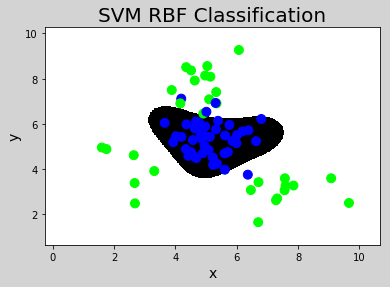

In [13]:
import sklearn.svm as svm
data = np.loadtxt('multiple2.txt', delimiter=',', dtype='f8')
x = data[:, :-1]
y = data[:, -1]
train_x, test_x, train_y, test_y = ms.train_test_split(x,
                                                       y,
                                                       test_size=0.25,
                                                       random_state=5)
# 基于RBF的支持向量机分类器
# model = svm.SVC(kernel='linear', class_weight='balanced')
model = svm.SVC(kernel='rbf', class_weight={0: 1, 1: 5})
model.fit(train_x, train_y)
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)
plt.figure('SVM RBF Classification', facecolor='lightgray')
plt.title('SVM RBF Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()